# Laboratory work #4

## Task 1 Introduction

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

In [4]:
df = pd.read_csv("salary_data_cleaned.csv")

In [5]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Level
0,45.0,Male,PhD,Manager,15.0,150000.0,Senior
1,38.0,Male,PhD,Scientist,10.0,110000.0,Senior
2,39.0,Male,PhD,Engineer,12.0,115000.0,Senior
3,24.0,Male,Bachelor's,Developer,1.0,40000.0,Junior
4,43.0,Female,PhD,Consultant,15.0,140000.0,Senior


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1532 entries, 0 to 1531
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1532 non-null   float64
 1   Gender               1532 non-null   object 
 2   Education Level      1532 non-null   object 
 3   Job Title            1532 non-null   object 
 4   Years of Experience  1532 non-null   float64
 5   Salary               1532 non-null   float64
 6   Level                1532 non-null   object 
dtypes: float64(3), object(4)
memory usage: 83.9+ KB


## Task 2 Data preprocessing

Perform preprocessing on your data - get rid of NANs, outliers and corrupted data, encode categorical data and perform scaling if necessary. You can use your Laboratory work 2

In [7]:
df.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Level                  0
dtype: int64

we don't have NaN values

In [8]:
df.shape

(1532, 7)

Delete outliers using z-score (standardization)

    z = (x - mean(x)) / std(x)


In [9]:
for column in ['Salary', 'Years of Experience']:
    mean = df[column].mean()
    std = df[column].std()
    z_score_threshold = 3
    df = df[(np.abs(df[column] - mean) / std) < z_score_threshold]

In [10]:
df.shape

(1526, 7)

so we see our data

In [11]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Level
0,45.0,Male,PhD,Manager,15.0,150000.0,Senior
1,38.0,Male,PhD,Scientist,10.0,110000.0,Senior
2,39.0,Male,PhD,Engineer,12.0,115000.0,Senior
3,24.0,Male,Bachelor's,Developer,1.0,40000.0,Junior
4,43.0,Female,PhD,Consultant,15.0,140000.0,Senior
...,...,...,...,...,...,...,...
1527,36.0,Female,PhD,Product Marketing Manager,10.0,100000.0,Senior
1528,49.0,Female,PhD,Product Marketing Manager,20.0,200000.0,Senior
1529,32.0,Male,High School,Sales Representative,3.0,40000.0,Junior
1530,51.0,Female,Master's,Product Marketing Manager,19.0,190000.0,Senior


## Encoding

In [12]:
label_encoders = {}
for column in ['Gender', 'Education Level', 'Job Title', 'Level']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [13]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Level
0,45.0,1,3,31,15.0,150000.0,1
1,38.0,1,3,54,10.0,110000.0,1
2,39.0,1,3,16,12.0,115000.0,1
3,24.0,1,0,15,1.0,40000.0,0
4,43.0,0,3,8,15.0,140000.0,1
...,...,...,...,...,...,...,...
1527,36.0,0,3,43,10.0,100000.0,1
1528,49.0,0,3,43,20.0,200000.0,1
1529,32.0,1,1,53,3.0,40000.0,0
1530,51.0,0,2,43,19.0,190000.0,1


In [14]:
df.describe()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Level
count,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000
mean,35.310616,0.547837,1.437090,42.410223,8.675295,105232.481651,0.624509
std,7.950369,0.497869,1.200399,15.758114,6.694816,58685.439205,0.484408
min,21.000000,0.000000,0.000000,0.000000,0.000000,350.000000,0.000000
25%,29.000000,0.000000,0.000000,35.000000,2.000000,45000.000000,0.000000
50%,34.000000,1.000000,2.000000,45.000000,8.000000,104378.000000,1.000000
75%,43.000000,1.000000,3.000000,58.000000,14.000000,160000.000000,1.000000
max,58.000000,1.000000,3.000000,63.000000,29.000000,210000.000000,1.000000


## Task 3 LogisticRegression

Task - Train LogisticRegression() model on your data, visualize predicted values.

In [15]:
X_regression = df.drop(columns=['Level'])
y_regression = df['Level']

In [16]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=13)

In [17]:
# бинарной классификации (например, "Класс 0" и "Класс 1" в Level)
log_reg = LogisticRegression(solver='liblinear')
# эффективно работает с меньшим объемом данных
log_reg.fit(X_train_reg, y_train_reg)

LogisticRegression(solver='liblinear')

In [18]:
y_pred_reg = log_reg.predict(X_test_reg)
y_pred_reg

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [19]:
print(classification_report(y_test_reg, y_pred_reg))

              precision    recall  f1-score   support

           0       0.96      0.87      0.92       119
           1       0.92      0.98      0.95       187

    accuracy                           0.94       306
   macro avg       0.94      0.93      0.93       306
weighted avg       0.94      0.94      0.94       306



Точность (Precision): Модель правильно предсказывает Класс 0 – 96%, Класс 1 – 92%.
Полнота (Recall): Модель правильно находит Класс 0 – 87%, Класс 1 – 98%.
Общая точность: 94%.

## Task 4 KNN

Task - KNeighborsClassifier() model on your data, visualize predicted values.

### KNN with One Label

In [20]:
X_knn = df['Age']  # First feature
Y_knn = df['Years of Experience']  # Second feature
T_knn = df['Level']  # Label

In [21]:
le = preprocessing.LabelEncoder()

In [22]:
X_encoded_knn = le.fit_transform(X_knn)
Y_encoded_knn = le.fit_transform(Y_knn)
T_encoded_knn = le.fit_transform(T_knn)

In [23]:
features = list(zip(X_encoded_knn, Y_encoded_knn))

In [24]:
knn_single_label = KNeighborsClassifier(n_neighbors=3)
knn_single_label.fit(features, T_encoded_knn)

KNeighborsClassifier(n_neighbors=3)

In [25]:
predictions_knn = knn_single_label.predict(features)

In [26]:
print(predictions_knn[:20], T_encoded_knn[:20])

[1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1] [1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1]


### KNN with Multiple Labels

KNN с параметром n_neighbors=3 подходит, так как обеспечивает баланс между детализацией и обобщением модели.

In [27]:
X_multilabel = df[['Age', 'Years of Experience', 'Salary']]
y_multilabel = df['Level']

In [28]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_multilabel, y_multilabel, test_size=0.2, random_state=13)

In [29]:
knn_multilabel = KNeighborsClassifier(n_neighbors=3)

In [30]:
knn_multilabel.fit(X_train_knn, y_train_knn)

KNeighborsClassifier(n_neighbors=3)

In [31]:
y_pred_multilabel = knn_multilabel.predict(X_test_knn)

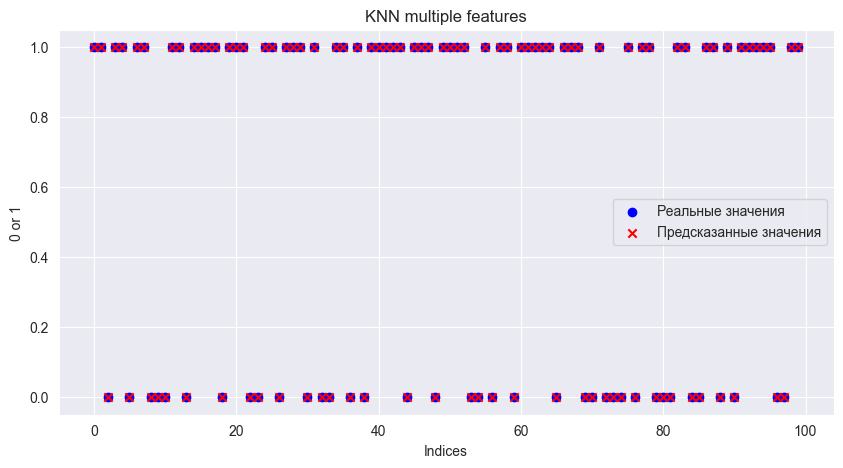

In [32]:
plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_test_knn[:100])), y_test_knn[:100], color='blue', label='Реальные значения', marker='o')
plt.scatter(range(len(y_pred_multilabel[:100])), y_pred_multilabel[:100], color='red', label='Предсказанные значения', marker='x')
plt.title('KNN multiple features')
plt.xlabel('Indices')
plt.ylabel('0 or 1')
plt.legend()
plt.show()

## Task 5 Metrics

## confusion_matrix

Given an actual label and a predicted label, the first thing we can do is divide our samples in 4 buckets:
    - True positive - actual = 1, predicted = 1
    - False positive - actual = 1, predicted = 0
    - False negative - actual = 0, predicted = 1
    - True negative - actual = 0, predicted = 0

Task 5.1 - create confusion matrices for LogisticRegression() and  KNeighborsClassifier() models

### LogisticRegression Model

In [33]:
cm_reg = confusion_matrix(y_test_reg, y_pred_reg)

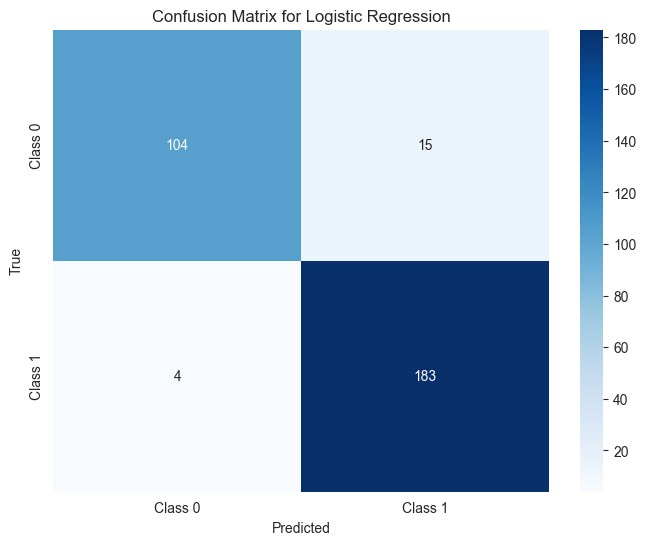

In [34]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_reg, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Анализ матрицы ошибок:

104: Верно классифицировано как Класс 0.
183: Верно классифицировано как Класс 1.
15: Ошибочно классифицировано как Класс 1 (для Класса 0).
4: Ошибочно классифицировано как Класс 0 (для Класса 1).
Модель лучше определяет Класс 1.

### KNeighborsClassifier Model

In [35]:
cm_knn = confusion_matrix(y_test_knn, y_pred_multilabel)

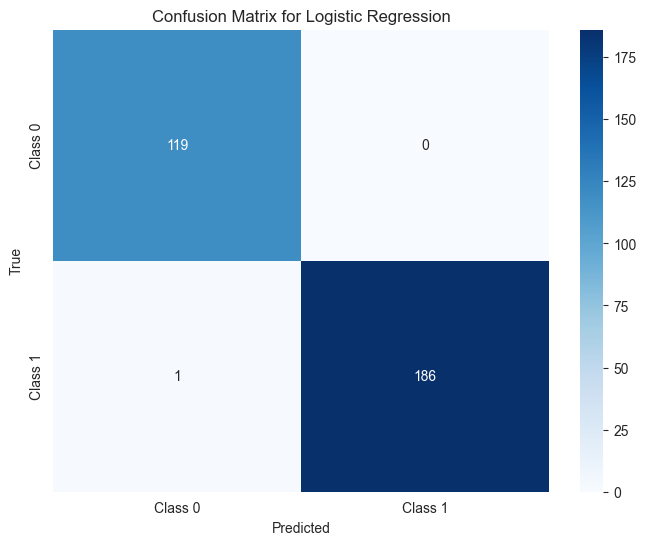

In [36]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## accuracy_score

Accuracy= Количество правильных предсказаний / Общее количество предсказаний

Task 5.2 - calculate accuracy scores for LogisticRegression() and  KNeighborsClassifier() models

In [37]:
from sklearn.metrics import accuracy_score

### LogisticRegression Model

In [38]:
log_reg_accuracy = accuracy_score(y_test_reg, y_pred_reg)
log_reg_accuracy

0.9379084967320261

### KNeighborsClassifier Model

In [39]:
knn_accuracy = accuracy_score(y_test_knn, y_pred_multilabel)
knn_accuracy

0.9967320261437909

## recall_score

Recall= Количество истинных положительных / Количество всех положительных в реальности

Task 5.3 - calculate recall scores for LogisticRegression() and  KNeighborsClassifier() models

In [40]:
from sklearn.metrics import recall_score

In [41]:
log_reg_recall = recall_score(y_test_reg, y_pred_reg, average='binary')
log_reg_recall

0.9786096256684492

In [42]:
knn_recall = recall_score(y_test_knn, y_pred_multilabel, average='binary')
knn_recall

0.9946524064171123

## precision_score

Precision= Количество истинных положительных / Количество всех предсказанных положительных

Task 5.4 - calculate precision scores for LogisticRegression() and  KNeighborsClassifier() models

In [43]:
from sklearn.metrics import precision_score

In [44]:
log_reg_precision = precision_score(y_test_reg, y_pred_reg, average='binary')
log_reg_precision

0.9242424242424242

In [45]:
knn_precision = precision_score(y_test_knn, y_pred_multilabel, average='binary')
knn_precision

1.0

## f1_score

F1-score = 2 ×  (Precision × Recall / Precision + Recall)

Task 5.5 - calculate f1_scores for LogisticRegression() and  KNeighborsClassifier() models

In [46]:
from sklearn.metrics import f1_score

In [47]:
log_reg_f1 = f1_score(y_test_reg, y_pred_reg, average='binary')
log_reg_f1

0.9506493506493506

In [48]:
knn_f1 = f1_score(y_test_knn, y_pred_multilabel, average='binary')
knn_f1

0.9973190348525469

## Task 6 Conclusion

#### In this laboratory work, we selected a dataset containing employee data (age, experience, salary) to predict the employee's level (for example, junior, senior) using models: logistic regression and KNN.

### at the end it was clear that:
Logistic regression:
Accuracy, completeness, and F1-score have shown that the model is well balanced and accurately classifies employee levels.
KNN:
Is sensitive to noise in the data, and its results may depend on the parameter n_neighbors.

Finally:
The logistic regression performed better due to the higher F1-score, which indicates a good balance between accuracy and completeness.
KNN is less reliable in this case due to possible noise and overlap in the data.
Conclusion: Logistic regression is a more suitable model for this task.